In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

raw_data = pd.read_csv("/Users/friederikebuchner/Documents/Beuth/Data Science/REG/linear_regression_sleep.csv")
                       
raw_data

,time_to_bed,min_until_sleep
0,20:15:00,20
1,21:00:00,45
2,20:45:00,45
3,21:00:00,25
4,20:50:00,40
5,20:30:00,50
6,22:05:00,15


In [2]:
# source: https://stackoverflow.com/questions/48447123/convert-time-hhmmss-to-minutes-in-python
from operator import mul

factors = (60, 1, 1/60)

#raw_data['time_to_bed'] = [(sum(i*j for i, j in zip(map(int, d.split(':')), factors))) for d in raw_data['time_to_bed']]
raw_data['time_to_bed'] = [(sum(map(mul, map(int, d.split(':')), factors)))/60 for d in raw_data['time_to_bed']]
raw_data

,time_to_bed,min_until_sleep
0,20.250000,20
1,21.000000,45
2,20.750000,45
3,21.000000,25
4,20.833333,40
5,20.500000,50
6,22.083333,15


source: https://nickmccullum.com/python-machine-learning/linear-regression-python/

example data: my own 

time_to_bed: time my kids went to bed (Licht aus) 

min_until_sleep: minutes until there was Ruhe im Karton

value to be predicted: min_until_sleep at a given time, i.e. when I put them to bed at a given time, how long will they need until they actually sleep?

In [3]:
### Let's create our x-array and assign it to a variable called x.
x = raw_data[['time_to_bed']]
### Next, let's create our y-array and assign it to a variable called y.
y = raw_data['min_until_sleep']

from sklearn.model_selection import train_test_split

### Splitting our Data Set into Training Data and Test Data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

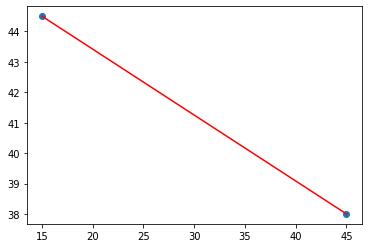

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

plt.plot(y_test, predictions, "r-")
plt.scatter(y_test, predictions)
#plt.plot_date(y_test, predictions, c = 'red')

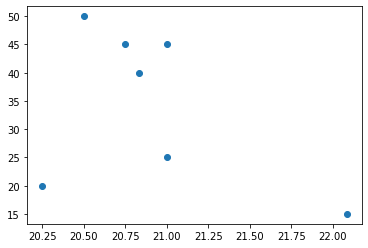

In [14]:
# zum Vergleich: ganzer scatter-plot:

plt.scatter(x,y)